# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [8]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
!pip install --upgrade numpy==1.26.4 pandas==2.2.2 seaborn==0.13.2 matplotlib==3.10.0 Pillow==11.1.0 tensorflow==2.18.0 keras==3.8.0 scikit-learn==1.6.1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import matplotlib
from PIL import Image
import tensorflow as tf
import keras
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

print(np.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib._get_version())
print(PIL.__version__)
print(tf.__version__)
print(keras.__version__)
print(sklearn.__version__)

1.26.4
2.2.2
0.13.2
3.10.0
11.1.0
2.18.0
3.8.0
1.6.1


Load the dataset.

In [10]:
# Load and unzip the dataset
import zipfile
import os
import io

file_path = "/content/data.zip"
try:
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall("./")
except zipfile.BadZipFile:
    print("Not a valid zip file.")
except Exception as e:
    print(f"An error occurred: {e}")

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [11]:
# Create a function to load the raw images
root_folder = "/content/data"
all_images = []
folder_labels = []
def load_images(image_base_path):
  try:
      img = Image.open(image_base_path)
      img = img.convert("RGB")
      return img
  except Exception as e:
      print(f"Error loading {image_base_path}: {e}")
      return None

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [12]:
# Get the images and their labels
# Iterate over all the waste categories folder and load all images from those folders.
for folder in os.listdir(root_folder):
  folder_path = os.path.join(root_folder, folder)
  if os.path.isdir(folder_path):
    for sample_image in os.listdir(folder_path):
      sample_image_path = os.path.join(folder_path, sample_image)
      img = load_images(sample_image_path)
      if img is not None:
        all_images.append(img)
        folder_labels.append(folder)
print(set(folder_labels))
unique_folder_labels_list = list(set(folder_labels))
print(f"No. of images loaded {len(all_images)}")
print(f"No. of waste category or labels: {unique_folder_labels_list}")

{'Glass', 'Paper', 'Food_Waste', 'Cardboard', 'Other', 'Metal', 'Plastic'}
No. of images loaded 7625
No. of waste category or labels: ['Glass', 'Paper', 'Food_Waste', 'Cardboard', 'Other', 'Metal', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

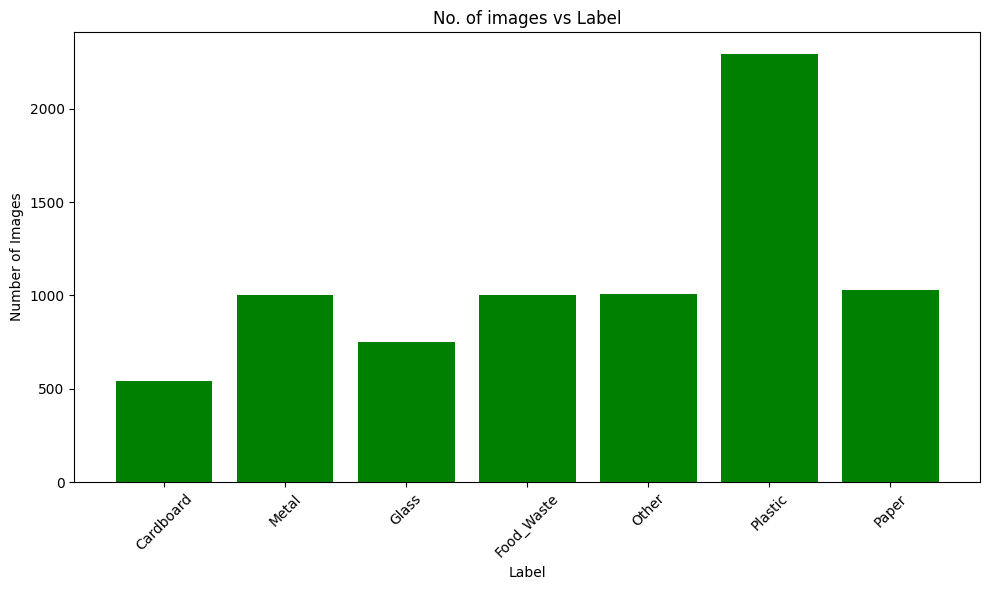

In [13]:
# Visualise Data Distribution
img_count_by_folder = {}
for label in folder_labels:
    if label in img_count_by_folder:
        img_count_by_folder[label] += 1
    else:
        img_count_by_folder[label] = 1

# for label, counts in img_count_by_folder.items():
#     print(f"No. of {label} images: {counts}")

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(img_count_by_folder.keys(), img_count_by_folder.values(), color='green')
plt.xlabel("Label")
plt.ylabel("Number of Images")
plt.title("No. of images vs Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print(folder_labels[100])
# print(all_images[100])

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

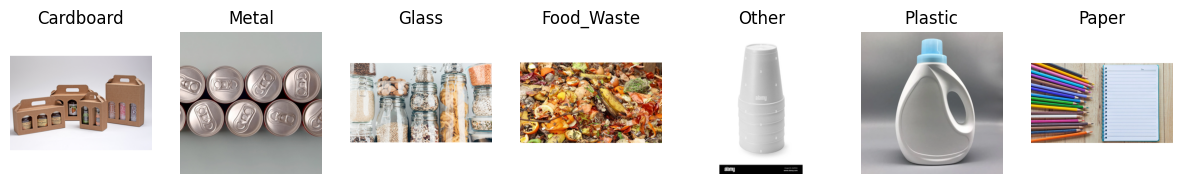

In [14]:
# Visualise Sample Images (across different labels)

# Store label and image as a key value pair
label_image_pair = zip(folder_labels, all_images)
label_image_pair_list = list(label_image_pair)
label_to_sample_image = {}

# Iterate over the image label pair list
for label, image in label_image_pair_list:
    if label not in label_to_sample_image:
        label_to_sample_image[label] = image

plt.figure(figsize=(15, 5))
for idx, (label, image) in enumerate(label_to_sample_image.items()):
    plt.subplot(1, len(label_to_sample_image), idx + 1)
    plt.title(label)
    plt.imshow(image)
    plt.axis('off')

plt.show()



#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [15]:
# Find the smallest and largest image dimensions from the data set
min_width, min_height = all_images[0].size
max_width, max_height = all_images[0].size
for image in all_images[1:]:
    width, height = image.size
    min_width = min(min_width, width)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    max_height = max(max_height, height)

print(f"Min Width: {min_width}")
print(f"Max Width: {max_width}")
print(f"Min Height: {min_height}")
print(f"Max Height: {max_height}")


Min Width: 256
Max Width: 256
Min Height: 256
Max Height: 256


In [16]:
# Resize the image dimensions
img_std_size = (224, 224)
resized_images_arr = []
for image in all_images:
    resized_image = image.resize(img_std_size)
    resized_images_arr.append(resized_image)

print(resized_images_arr[0].size)
print(len(resized_images_arr))
print(resized_images_arr[0])

(224, 224)
7625
<PIL.Image.Image image mode=RGB size=224x224 at 0x7D38B85A1D10>


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [17]:
# Encode the labels suitably
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(folder_labels)

print("Folder labels:", label_encoder.classes_)
print("Encoded labels:", numeric_labels)

Folder labels: ['Cardboard' 'Food_Waste' 'Glass' 'Metal' 'Other' 'Paper' 'Plastic']
Encoded labels: [0 0 0 ... 5 5 5]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [18]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(resized_images_arr, numeric_labels, test_size=0.2, random_state=42, stratify=numeric_labels)
X_train = np.array([np.array(img) for img in X_train]) # Convert image to numpy array
X_val = np.array([np.array(img) for img in X_val])
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_train.dtype)
print(X_train[0][0][0])

# Normalize the input image pixel values
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0



(6100, 224, 224, 3)
(1525, 224, 224, 3)
(6100,)
(1525,)
uint8
[255 255 255]


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [4]:
# Build and compile the model
configurations = [
    {'name': 'Config 1', 'filters': 32, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.2, 'conv_layers': 3},
    {'name': 'Config 2', 'filters': 64, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.3, 'conv_layers': 3},
    {'name': 'Config 3', 'filters': 128, 'kernel_size': (3, 3), 'pool_size': (2, 2), 'activation': 'relu', 'dropout_rate': 0.4, 'conv_layers': 3},
]

# Function to build the model
def create_model(config):
  model = Sequential()
  for i in range(config['conv_layers']):
    model.add(Conv2D(config['filters'], config['kernel_size'], activation=config['activation'], input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=config['pool_size']))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(config['dropout_rate']))
  model.add(Dense(len(unique_folder_labels_list), activation='softmax'))
  return model

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [5]:
# Training
epoch = 10
batch_size=32
history_dict = {}
model_dict = {}

for config in configurations:
  model = create_model(config)
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, validation_data=(X_val, y_val))
  history_dict[config['name']] = history
  model_dict[config['name']] = model



NameError: name 'Sequential' is not defined

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [2]:
# Evaluate on the test set; display suitable metrics
for name, model in model_dict.items():
    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
    print(f"{name} → Loss: {loss:.4f}, Accuracy: {accuracy:.2%}")

NameError: name 'model_dict' is not defined

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [ ]:
# Define augmentation steps to augment images



Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [ ]:
# Create a function to augment the images




In [ ]:
# Create the augmented training dataset



##### **4.1.2**

Train the model on the new augmented dataset.

In [ ]:
# Train the model using augmented images



## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results